In [ ]:
pip install lassonet

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from lassonet import LassoNetClassifier
import pandas as pd
from sklearn import preprocessing
from lassonet import LassoNetClassifier, plot_cv, plot_path
from lassonet.interfaces import LassoNetClassifierCV
from tensorflow.keras.utils import to_categorical

In [ ]:
# data preparation
from google.colab import drive
drive.mount('/content/gdrive')

variables_df=pd.read_csv("/content/gdrive/My Drive/Data/gene_expression_cancer.csv", header=None)
labels_df=pd.read_csv("/content/gdrive/My Drive/Data/gene_expression_cancer_label.csv", header=None)

# combine variables and label into one dataframe
labels=labels_df.iloc[:,1]
sample_number=variables_df.iloc[:, 0]
data_df=pd.concat([sample_number, labels, variables_df.iloc[:, 1:]], axis=1)

# reset column names to be 0, 1, 2, ...
data_df.columns=range(data_df.shape[1])
data=data_df.values

Mounted at /content/gdrive


<ipython-input-4-d800ee16e7eb>:5: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263

In [ ]:
X=data[1:,2:]
y=data[1:,1]

# normalize X (variables)
normalized_X=preprocessing.normalize(X)
normalized_X=pd.DataFrame(normalized_X)
X=normalized_X.values

# encode target labels
y=preprocessing.LabelEncoder().fit_transform(y)
Y=to_categorical(y)

# trim the extra row from y
Y=Y[:X.shape[0]]
y=y[:X.shape[0]]

# Y: one-hot encoded label
X_train_1, X_test_1, Y_train, Y_test = train_test_split(X, Y)

# y: not one-hot encoded label so that it can be used for LassoNet
X_train, X_test, y_train, y_test = train_test_split(X, y)

Choosing lambda with cross-validation: 100%|██████████| 5/5 [12:27<00:00, 149.48s/it]


Best model scored 0.36318407960199006


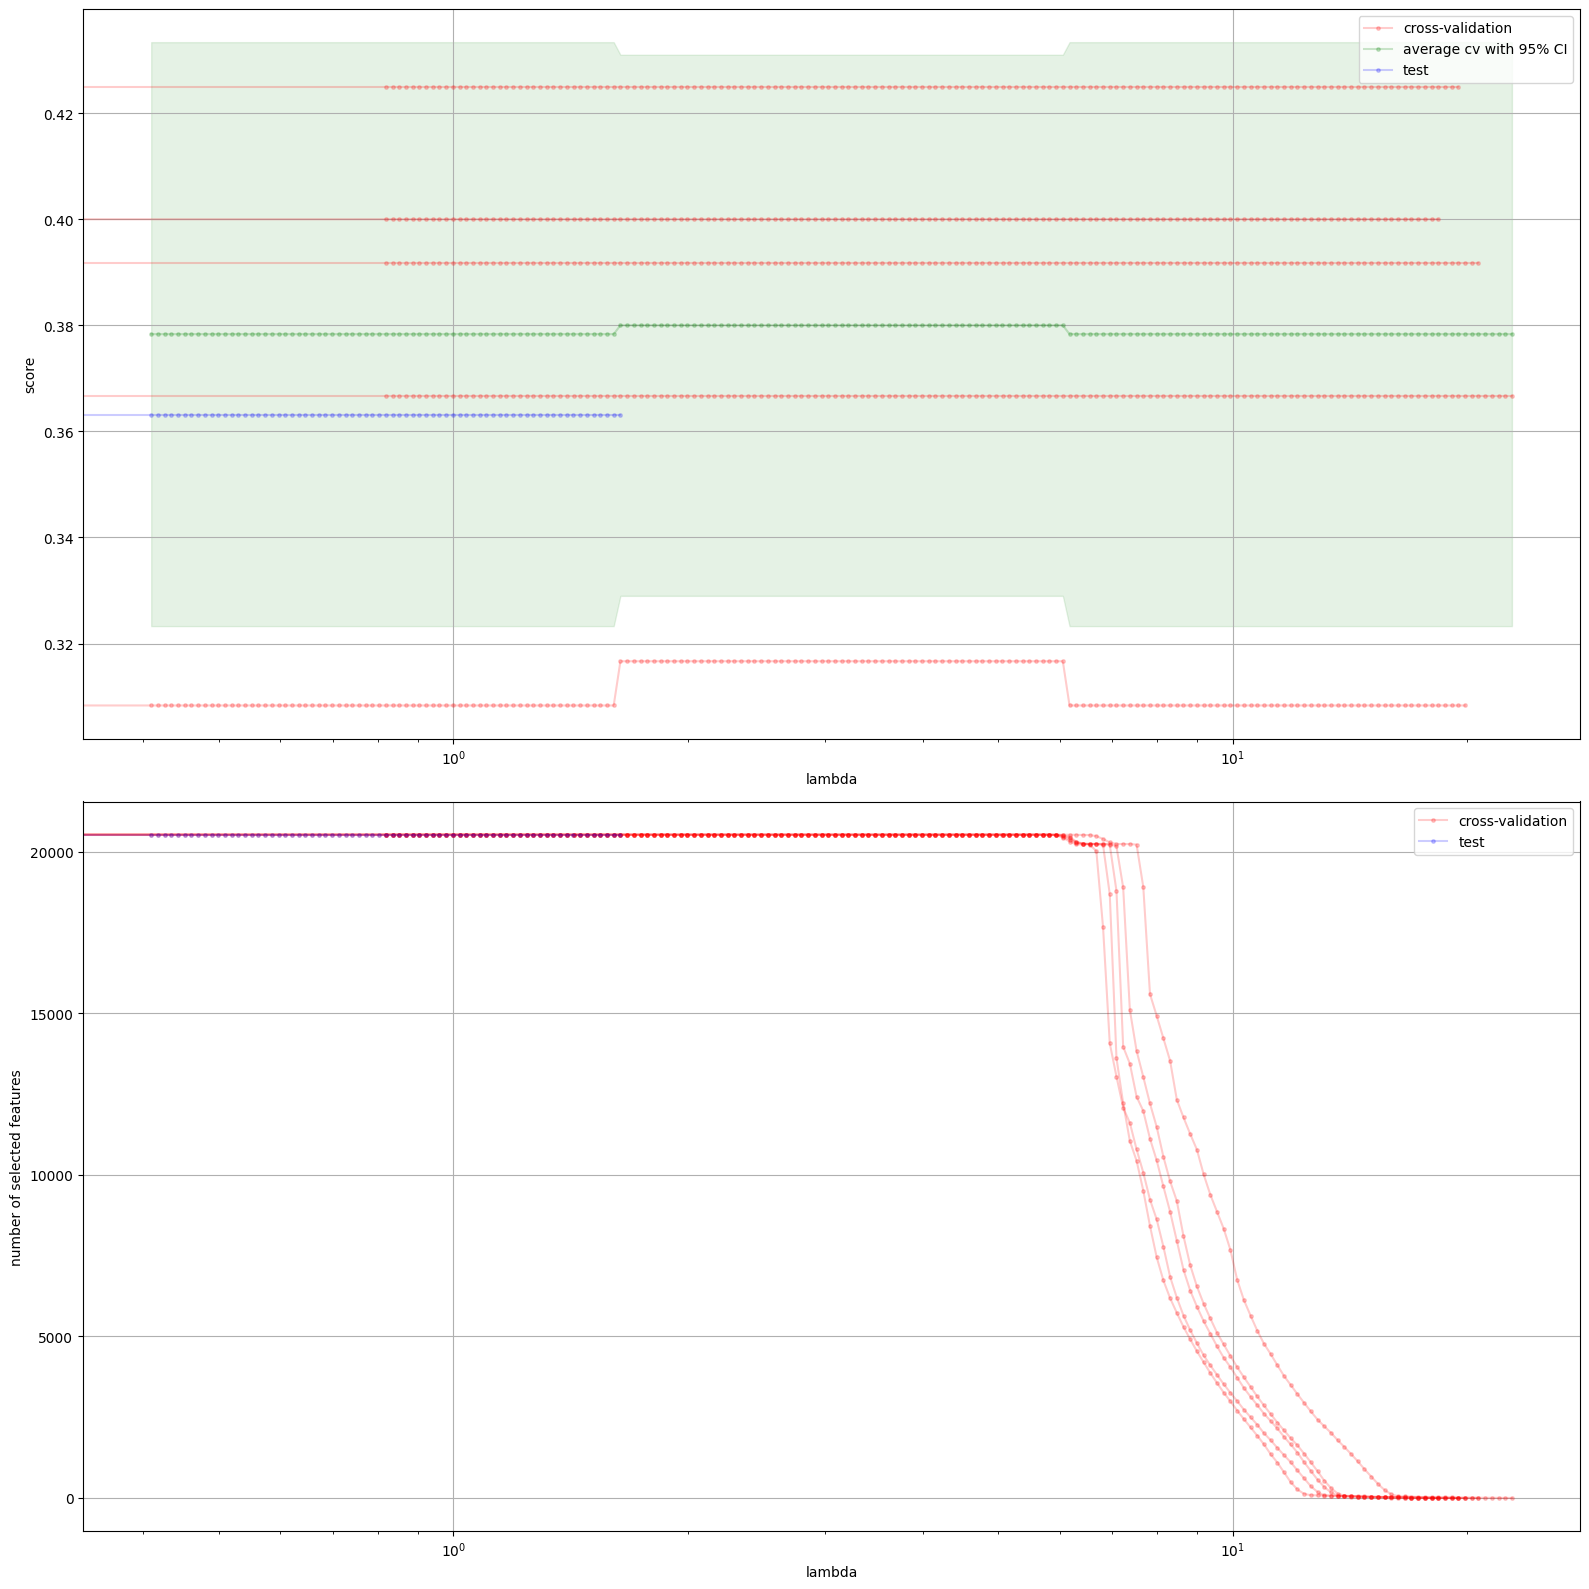

In [ ]:
# define the model

# LassoNet + Cross-Validation
model1=LassoNetClassifierCV()
model1.path(X_train, y_train, return_state_dicts=True)
print("Best model scored", model1.score(X_test, y_test))
plot_cv(model1, X_test, y_test)
plt.savefig("gene_cancer_cv.png")

In [ ]:
# LassoNet
model2=LassoNetClassifier()
path2=model2.path(X_train, y_train, return_state_dicts=True)
plot_path(model2, X_test, y_test)
plt.savefig("gene_cancer.png")

KeyboardInterrupt: 

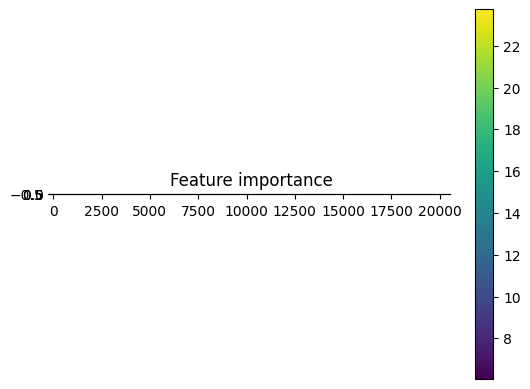

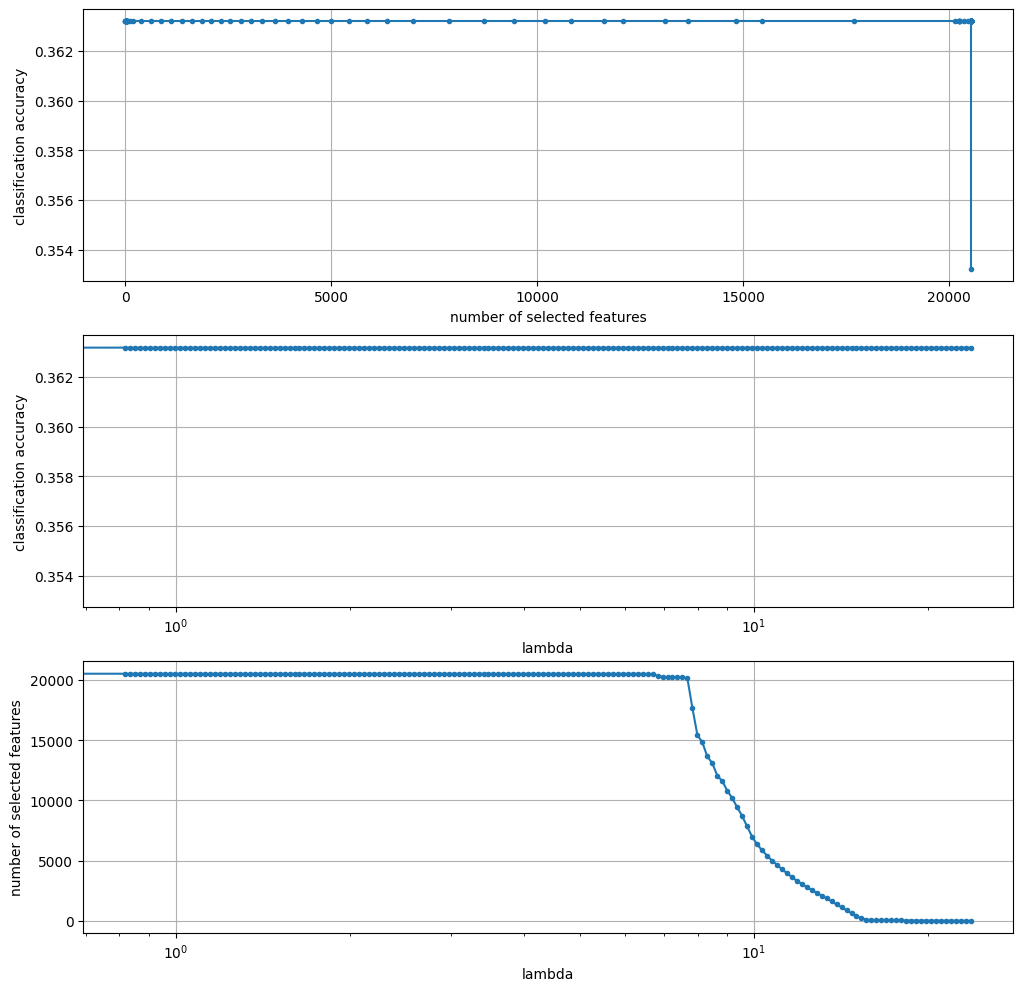

In [ ]:
img = model2.feature_importances_.reshape(1, 20531)

plt.title("Feature importance")
plt.imshow(img)
plt.colorbar()
plt.savefig("gene-classification-importance.png")

n_selected = []
accuracy = []
lambda_ = []

for save in path2:
    model2.load(save.state_dict)
    y_pred = model2.predict(X_test)
    n_selected.append(save.selected.sum())
    accuracy.append(accuracy_score(y_test, y_pred))
    lambda_.append(save.lambda_)

to_plot = [160, 220, 300]

fig = plt.figure(figsize=(12, 12))

plt.subplot(311)
plt.grid(True)
plt.plot(n_selected, accuracy, ".-")
plt.xlabel("number of selected features")
plt.ylabel("classification accuracy")

plt.subplot(312)
plt.grid(True)
plt.plot(lambda_, accuracy, ".-")
plt.xlabel("lambda")
plt.xscale("log")
plt.ylabel("classification accuracy")

plt.subplot(313)
plt.grid(True)
plt.plot(lambda_, n_selected, ".-")
plt.xlabel("lambda")
plt.xscale("log")
plt.ylabel("number of selected features")

plt.savefig("gene-classification-training.png")

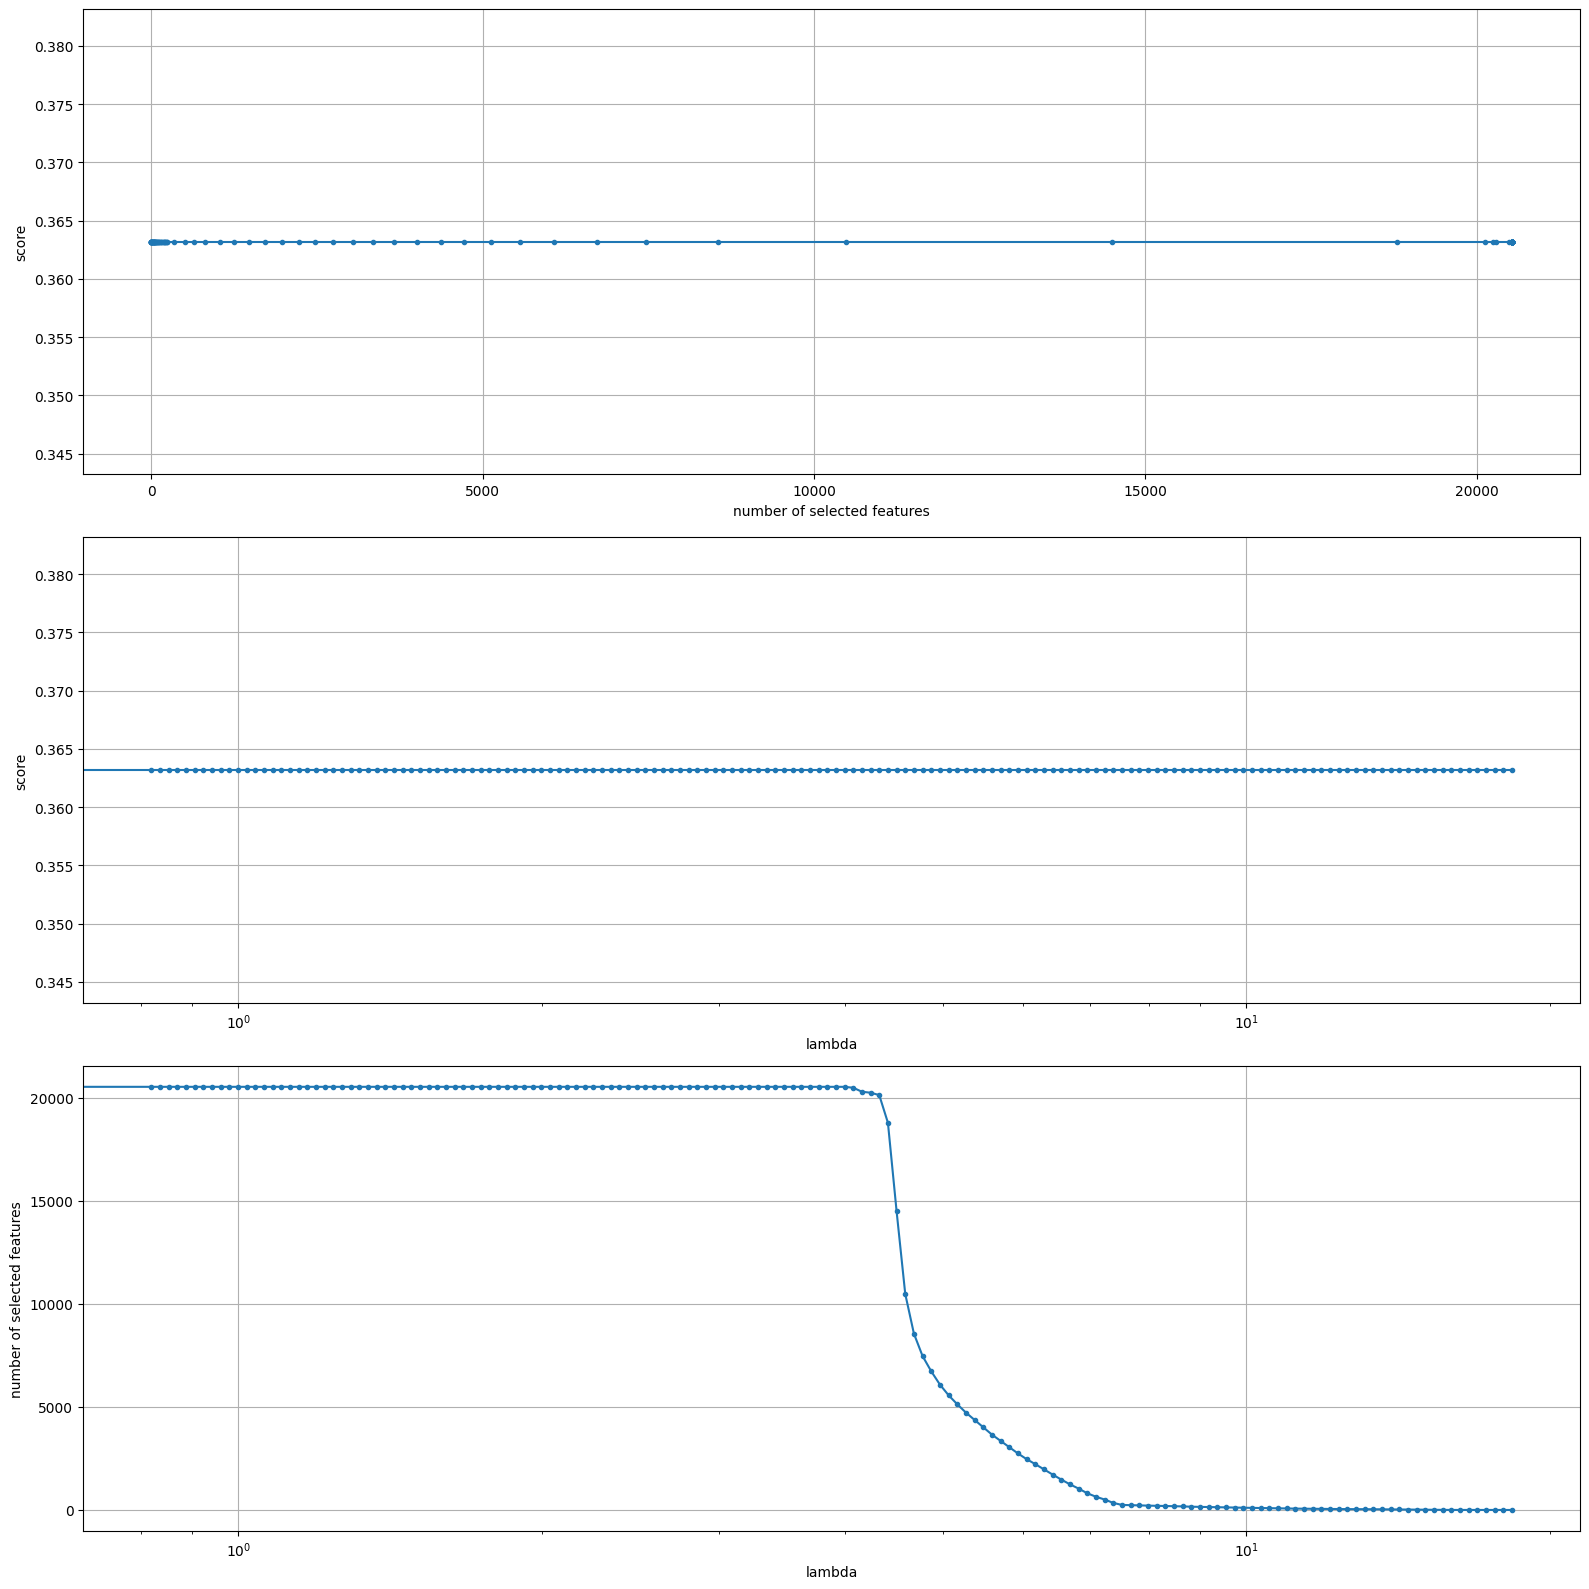

In [ ]:
# LassoNet + dropout
model3=LassoNetClassifier(dropout=0.5)
path3=model3.path(X_train, y_train, return_state_dicts=True)
plot_path(model3, X_test, y_test)
plt.savefig("gene_cancer_dropout.png")

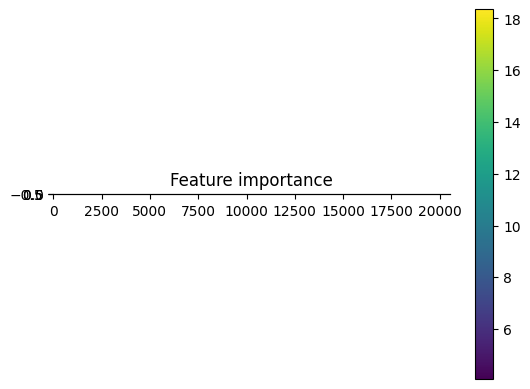

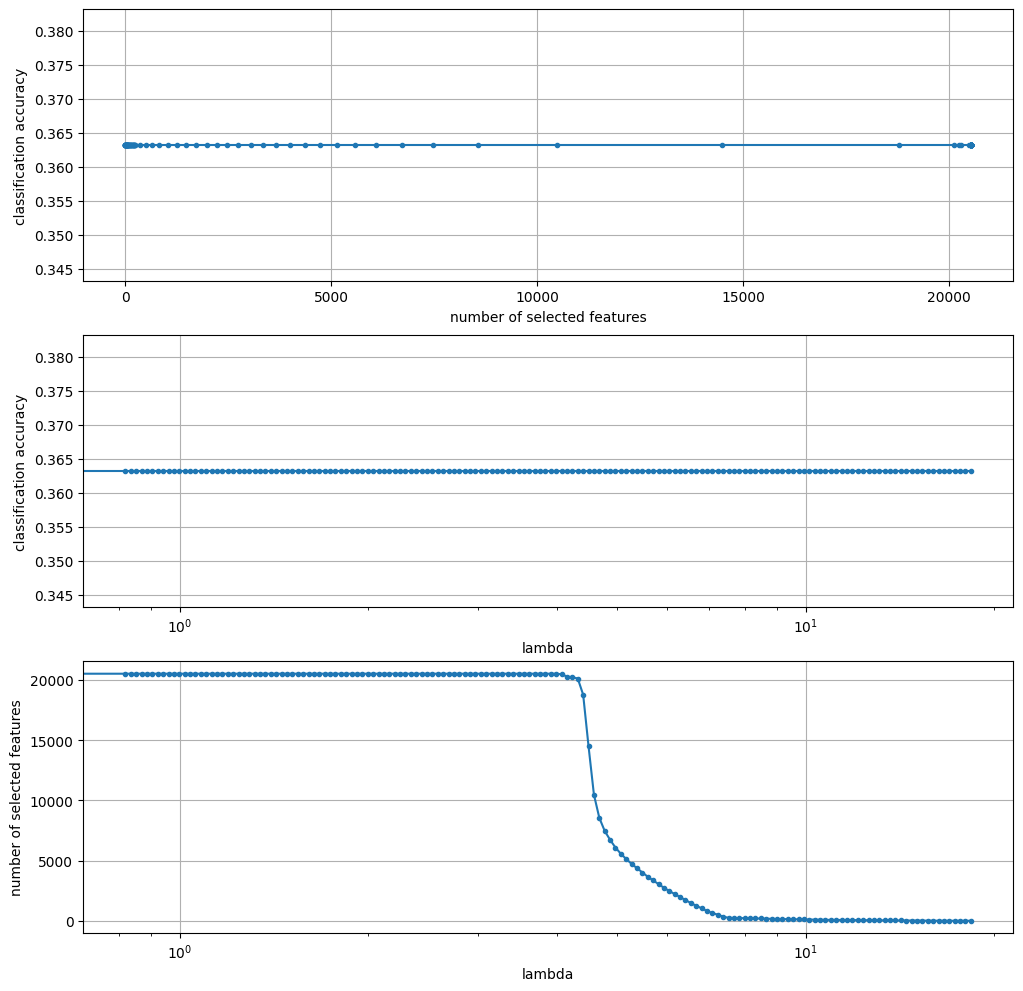

In [ ]:
img = model3.feature_importances_.reshape(1, 20531)

plt.title("Feature importance")
plt.imshow(img)
plt.colorbar()
plt.savefig("gene-classification-importance-model3.png")

n_selected = []
accuracy = []
lambda_ = []

for save in path3:
    model2.load(save.state_dict)
    y_pred = model2.predict(X_test)
    n_selected.append(save.selected.sum())
    accuracy.append(accuracy_score(y_test, y_pred))
    lambda_.append(save.lambda_)

to_plot = [160, 220, 300]

fig = plt.figure(figsize=(12, 12))

plt.subplot(311)
plt.grid(True)
plt.plot(n_selected, accuracy, ".-")
plt.xlabel("number of selected features")
plt.ylabel("classification accuracy")

plt.subplot(312)
plt.grid(True)
plt.plot(lambda_, accuracy, ".-")
plt.xlabel("lambda")
plt.xscale("log")
plt.ylabel("classification accuracy")

plt.subplot(313)
plt.grid(True)
plt.plot(lambda_, n_selected, ".-")
plt.xlabel("lambda")
plt.xscale("log")
plt.ylabel("number of selected features")

plt.savefig("gene-classification-training_model3.png")

In [ ]:
# Lasso classifier (not LassoNet)

from sklearn.linear_model import Lasso

alpha=[0.0001, 0.001, 0.1, 1]

for i in alpha:
  # Lasso regression
  model4 = Lasso(alpha=i)
  model4.fit(X_train_1, Y_train)

  # make predictions
  y_pred = model4.predict(X_test_1)

  # evaluate the model
  acc = accuracy_score(Y_test, y_pred.round())

  print(f"Accuracy: {acc}")

Accuracy: 0.9800995024875622
Accuracy: 0.6318407960199005
Accuracy: 0.0
Accuracy: 0.0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 219ms/step - accuracy: 0.3151 - loss: 1.5497 - val_accuracy: 0.3781 - val_loss: 1.4126
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4173 - loss: 1.3777 - val_accuracy: 0.4527 - val_loss: 1.1956
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6271 - loss: 1.1531 - val_accuracy: 0.6020 - val_loss: 0.8976
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7277 - loss: 0.8038 - val_accuracy: 0.9801 - val_loss: 0.5328
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9520 - loss: 0.4524 - val_accuracy: 0.9950 - val_loss: 0.2812
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9944 - loss: 0.2110 - val_accuracy: 0.9950 - val_loss: 0.1419
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9955 - loss: 0.1122 - val_accuracy: 0.9950 - val_loss: 0.0850
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9974 - loss: 0.0589 - val_accuracy: 0.9950 - 

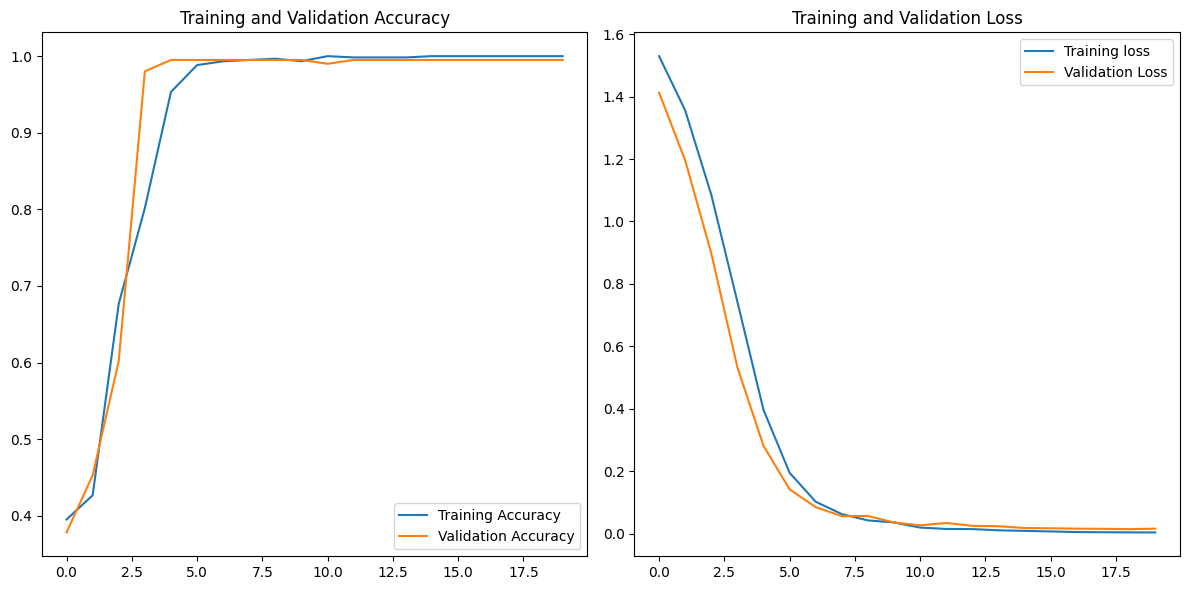

In [ ]:
# model 5: deep feedforward neurla network

model5=Sequential()
model5.add(Dense(1024, input_shape=(20531,), activation='relu'))
model5.add(Dense(256, activation='relu'))
model5.add(Dense(5, activation='softmax'))

model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model5.fit(X_train_1, Y_train, epochs=20, batch_size=64, validation_data=(X_test_1, Y_test))

_, train_accuracy = model5.evaluate(X_train_1, Y_train, verbose=0)
_, test_accuracy = model5.evaluate(X_train_1, Y_train, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_accuracy, test_accuracy))

# plot
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.savefig('gene_model5.png')
plt.show()